<h1>1. Real-World Problem </h1>

<h2>1.1. Problem Statement </h2>

Build a model on the basis given features and target column to predict whether a bank is going to get bankrupt for a given set of features

<h2>1.2. Real-world objectives and constraints.</h2>

1. Maximize AUC on train and CV data, gap of AUC on train and cv should be as low as possible

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<p> The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analysed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013. </p>

Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:

- 1st Year the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2nd Year  the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rd Year  the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4th Year the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5th Year  the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

**` Class - 0 `** did not get bankrupt ,  **` Class - 1 `**  - got bankrupt


Feature | Description 
----------|---------------
**` X1 net profit `** | total assets
X2 total liabilities | total assets
X3 working capital | total assets
X4 current assets | short-term liabilities
X5 [(cash + short-term securities + receivables - short-term liabilities) | (operating expenses - depreciation)] * 365
X6 retained earnings | total assets
X7 EBIT | total assets
X8 book value of equity | total liabilities
X9 sales | total assets
X10 equity | total assets
X11 (gross profit + extraordinary items + financial expenses) | total assets
X12 gross profit | short-term liabilities
X13 (gross profit + depreciation) | sales
X14 (gross profit + interest) | total assets
X15 (total liabilities * 365) | (gross profit + depreciation)
X16 (gross profit + depreciation) | total liabilities
X17 total assets | total liabilities
X18 gross profit | total assets
X19 gross profit | sales
X20 (inventory * 365) | sales
X21 sales (n) | sales (n-1)
X22 profit on operating activities | total assets
X23 net profit | sales
X24 gross profit (in 3 years) | total assets
X25 (equity - share capital) | total assets
X26 (net profit + depreciation) | total liabilities
X27 profit on operating activities | financial expenses
X28 working capital | fixed assets
X29 logarithm of total assets
X30 (total liabilities - cash) | sales
X31 (gross profit + interest) | sales
X32 (current liabilities * 365) | cost of products sold
X33 operating expenses | short-term liabilities
X34 operating expenses | total liabilities
X35 profit on sales | total assets
X36 total sales | total assets
X37 (current assets - inventories) | long-term liabilities
X38 constant capital | total assets
X39 profit on sales | sales
X40 (current assets - inventory - receivables) | short-term liabilities
X41 total liabilities | ((profit on operating activities + depreciation) * (12|365))
X42 profit on operating activities | sales
X43 rotation receivables + inventory turnover in days
X44 (receivables * 365) | sales
X45 net profit | inventory
X46 (current assets - inventory) | short-term liabilities
X47 (inventory * 365) | cost of products sold
X48 EBITDA (profit on operating activities - depreciation) | total assets
X49 EBITDA (profit on operating activities - depreciation) | sales
X50 current assets | total liabilities
X51 short-term liabilities | total assets
X52 (short-term liabilities * 365) | cost of products sold)
X53 equity | fixed assets
X54 constant capital | fixed assets
X55 working capital
X56 (sales - cost of products sold) | sales
X57 (current assets - inventory - short-term liabilities) | (sales - gross profit - depreciation)
X58 total costs |total sales
X59 long-term liabilities | equity
X60 sales | inventory
X61 sales | receivables
X62 (short-term liabilities *365) | sales
X63 sales | short-term liabilities
X64 sales | fixed assets





<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
 There are two different classes that we need to classify a given a data point => classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Metric: 
* ROC-AUC

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the classes.
</p>
<p> Constraints:
</p>

* Class probabilities are needed.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into two parts train and cross validation  with 80%,20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import os

import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import xgboost as xgb
import catboost
import joblib
from sklearn.impute import SimpleImputer

<h2>3.1. Reading Data</h2>

<h3>3.1.1. BankruptcyPrediction Data</h3>

In [2]:
# readin
year1 = pd.read_csv('1year.csv')
year2 = pd.read_csv('2year.csv')
year3 = pd.read_csv('3year.csv')
year4 = pd.read_csv('4year.csv')
year5 = pd.read_csv('5year.csv')

In [3]:
print(year1.shape)
print(year2.shape)
print(year3.shape)
print(year4.shape)
print(year5.shape)

(7012, 65)
(10173, 65)
(10476, 65)
(9539, 65)
(5427, 65)


In [4]:
project_data = pd.concat([year1,year2,year3,year4,year4,year5])

In [5]:
project_data.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [6]:
# checking if i have got the Null values into the data 
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52166 entries, 0 to 5426
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   52166 non-null  object
 1   Attr2   52166 non-null  object
 2   Attr3   52166 non-null  object
 3   Attr4   52166 non-null  object
 4   Attr5   52166 non-null  object
 5   Attr6   52166 non-null  object
 6   Attr7   52166 non-null  object
 7   Attr8   52166 non-null  object
 8   Attr9   52166 non-null  object
 9   Attr10  52166 non-null  object
 10  Attr11  52166 non-null  object
 11  Attr12  52166 non-null  object
 12  Attr13  52166 non-null  object
 13  Attr14  52166 non-null  object
 14  Attr15  52166 non-null  object
 15  Attr16  52166 non-null  object
 16  Attr17  52166 non-null  object
 17  Attr18  52166 non-null  object
 18  Attr19  52166 non-null  object
 19  Attr20  52166 non-null  object
 20  Attr21  52166 non-null  object
 21  Attr22  52166 non-null  object
 22  Attr23  52166 non-null 

In [7]:
# Replacing the "?" with NaN values in the dataset to impute with mean of 
project_data = project_data.replace('?',np.nan)

In [8]:
# changing the data types to float64 for all the attributes 
cols = project_data.columns
def convert_datatype():
    pro = {}
    for col in cols:
        if(col != 'class'):
            pro[col] = float
        else:
            pro[col] = int
    return pro
    
pro = convert_datatype()
project_data = project_data.astype(pro)
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52166 entries, 0 to 5426
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   52157 non-null  float64
 1   Attr2   52157 non-null  float64
 2   Attr3   52157 non-null  float64
 3   Attr4   51991 non-null  float64
 4   Attr5   52059 non-null  float64
 5   Attr6   52157 non-null  float64
 6   Attr7   52157 non-null  float64
 7   Attr8   52053 non-null  float64
 8   Attr9   52157 non-null  float64
 9   Attr10  52157 non-null  float64
 10  Attr11  52122 non-null  float64
 11  Attr12  51991 non-null  float64
 12  Attr13  52019 non-null  float64
 13  Attr14  52157 non-null  float64
 14  Attr15  52122 non-null  float64
 15  Attr16  52052 non-null  float64
 16  Attr17  52053 non-null  float64
 17  Attr18  52157 non-null  float64
 18  Attr19  52018 non-null  float64
 19  Attr20  52019 non-null  float64
 20  Attr21  46167 non-null  float64
 21  Attr22  52157 non-null  float64
 22 

In [9]:
#  datasets are highly inbalanced as only 4.80% data have class == 1 ( companies filed bankrupcy)
# therefore we will use the AUC will be used to find the model performance 
print(project_data['class'].value_counts())
project_data[project_data['class'] == 1].count()[1]/ project_data['class'].count() * 100

0    49602
1     2564
Name: class, dtype: int64


4.913161829544148

In [10]:
project_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,52157.000000,52157.000000,52157.000000,51991.000000,5.205900e+04,52157.000000,52157.000000,52053.000000,52157.000000,52157.000000,...,5.201900e+04,52158.000000,5.206700e+04,52158.000000,4.943000e+04,52035.000000,5.201900e+04,51991.000000,51144.000000,52166.000000
mean,0.036233,0.593828,0.114700,6.712170,-3.091119e+02,-0.058640,0.087610,14.183377,2.532196,0.584507,...,-2.200166e+01,-0.003459,2.517735e+01,1.259351,3.944654e+02,18.754640,1.626185e+03,9.267966,66.428415,0.049151
std,2.735434,5.687854,5.340165,297.451285,5.622896e+04,7.201272,5.216327,551.901654,57.913269,13.529209,...,4.859771e+03,13.060145,4.865845e+03,111.956650,2.958216e+04,693.665284,1.367975e+05,116.295310,2170.816169,0.216185
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003049,0.268860,0.020447,1.047600,-4.982300e+01,0.000000,0.005142,0.428620,1.016500,0.294550,...,8.179000e-03,0.013463,8.771350e-01,0.000000,5.521075e+00,4.498500,4.217250e+01,3.075850,2.143775,0.000000
50%,0.047860,0.471940,0.196200,1.570100,-1.055300e+00,0.000000,0.057396,1.070400,1.192400,0.505980,...,5.114800e-02,0.115480,9.524300e-01,0.005481,9.785200e+00,6.610200,7.180700e+01,5.052400,4.243600,0.000000
75%,0.126330,0.689090,0.403640,2.795400,5.116750e+01,0.083498,0.147460,2.618800,2.054600,0.709680,...,1.268500e-01,0.278012,9.932500e-01,0.233860,2.017700e+01,10.364000,1.179300e+02,8.581600,9.726925,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


In [11]:
# dropping target from the data sets and storing into y
y = project_data['class'].values
project_data.drop(['class'], axis=1, inplace=True)
project_data.head(1)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,348690.0,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277


In [12]:
x = project_data

<h4>3.2. Splitting  data into train and cross validation (80:20)</h4>

In [13]:
# splitting the datasets with 80% for training and 20% testing , used stratify = y as data is highly inbalance  

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=0.20, stratify=y)

<h4>3.3. Distribution of y_i's in Train and Cross Validation datasets</h4>

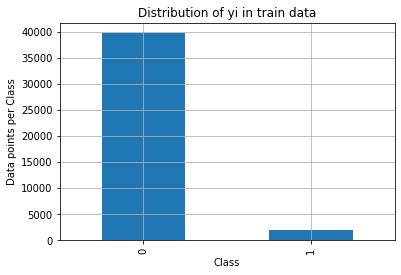

Number of data points in class 0 : 39681 ( 95.085 %)
Number of data points in class 1 : 2051 ( 4.915 %)
--------------------------------------------------------------------------------


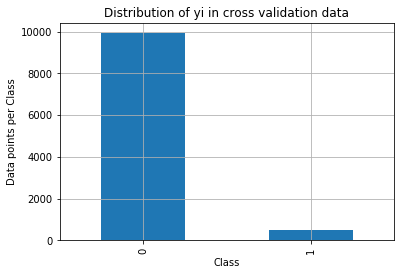

Number of data points in class 0 : 9921 ( 95.083 %)
Number of data points in class 1 : 513 ( 4.917 %)


In [14]:
# it returns a dict, keys as Rating labels and values as the number of data points in that class
train_class_distribution = pd.value_counts(y_train).sort_index()
cv_class_distribution = pd.value_counts(y_cv).sort_index()

train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

    
print('-'*80)
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
        print('Number of data points in class', i, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')


<h4>3.4. Imputing the column values with average value using SimpleImputer </h4>

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html 
# imputing missing value with mean(average) value
imp_medium = SimpleImputer(strategy="mean", missing_values=np.nan)
imp_medium.fit(X_train)
X_train = imp_medium.transform(X_train)
X_cv = imp_medium.transform(X_cv)

<h4>3.5. Standardizing column values   </h4>

In [17]:
scalar = StandardScaler()
scalar.fit(X_train)
joblib.dump(scalar,'trainscalar.pkl')
X_train = scalar.transform(X_train)
X_cv = scalar.transform(X_cv)

In [18]:
X_train = pd.DataFrame(X_train)
X_cv = pd.DataFrame(X_cv)

In [19]:
# converting the train  , and cv data into the format that xgboost expects 
dtrain = xgb.DMatrix(X_train,label=y_train)
dcv = xgb.DMatrix(X_cv,label=y_cv)

<h1>4. Machine Learning Model</h1>

<h3>4.1.1. XGboost Model</h3>

<h3>4.1.2. Initializing the Parameters</h3>

In [23]:
param = {
    'max_depth': 9,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob', 
    'eval_metric' : 'auc', # error evaluation for multiclass training
    'num_class' : 2,
    'min_child_weight' : 1
    }  # the number of classes that exist in this datset
num_round = 122 

<h3>4.1.3. Training the model with above hyperparameters and plotting Train and CV AUC</h3>

CPU times: user 4min 26s, sys: 7.29 s, total: 4min 34s
Wall time: 2min 25s
CPU times: user 15.5 ms, sys: 97 µs, total: 15.6 ms
Wall time: 11 ms
CPU times: user 349 ms, sys: 0 ns, total: 349 ms
Wall time: 214 ms


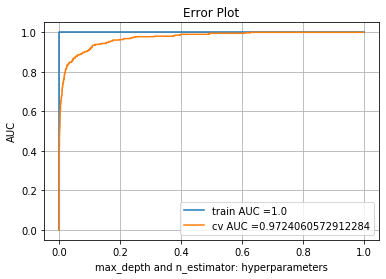

In [24]:
%time bst = xgb.train(param, dtrain, num_round)

%time y_train_pred_set1 = bst.predict(dtrain)[:,1]
%time y_cv_pred_set1 = bst.predict(dcv)[:,1]

train_fpr,train_tpr,train_threshold = roc_curve(y_train,y_train_pred_set1,pos_label=1)
cv_fpr,cv_tpr,cv_threshold = roc_curve(y_cv,y_cv_pred_set1,pos_label=1)

plt.plot(train_fpr,train_tpr,label='train AUC ='+str(auc(train_fpr,train_tpr)))
plt.plot(cv_fpr,cv_tpr,label='cv AUC ='+str(auc(cv_fpr,cv_tpr)))
plt.legend()

plt.xlabel('max_depth and n_estimator: hyperparameters')
plt.ylabel('AUC')
plt.title("Error Plot")
plt.grid()
plt.show()

<h3>4.1.4. Saving the model in "bankruptpred.model"</h3>

In [22]:
bst.save_model("bankruptpred.model")